# Worksheet for Correlation Analysis

In [13]:
import os.path
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

### Download data and load into a dataframe

In [14]:
#### LOAD THE HELPER FUNCTIONS BELOW####
#### IMPORTANT: DONOT change these functions or your final submission will not evaluate correctly###

## This downloads your datafile, Do not change this function
def downloadFile(dataSetId):
      fileName = '%s.csv' % (dataSetId)
      url = 'https://s3.us-east-2.amazonaws.com/qq-data/qq-spring2019/' + fileName

      response = urlopen(url)
      status = response.getcode()
      if status == 200:
          print('Downloading the dataset %s' % (fileName))
          with open(fileName, 'w') as f:
              f.write(response.read().decode('utf8'))
          return True
      else:
          logError('File not found. Please ensure you are working with correct data set Id')
          return False


In [17]:
filename = 'feature_data'
# if not os.path.isfile('%s.csv'%filename):
#     downloadFile('%s'%filename)
df_train = pd.read_csv('data/%s.csv'%filename)
df_train.columns

Index(['time', 'Alpha_A1_1', 'Alpha_A1_2', 'Alpha_A1_3', 'Alpha_A1_4',
       'Alpha_A1_5', 'Alpha_A1_6', 'Alpha_A1_7', 'Alpha_A1_8', 'Alpha_A1_9',
       ...
       'Beta_B_87919', 'Beta_B_87920', 'Beta_B_87921', 'Beta_B_87922',
       'Beta_C_87923', 'Beta_B_87924', 'Beta_B_87925', 'Beta_B_87926',
       'Beta_B_87927', 'Beta_C_87928'],
      dtype='object', length=88307)

In [22]:
filename = 'target_variable_data'
# if not os.path.isfile('%s.csv'%filename):
#     downloadFile('%s'%filename)
y_train = pd.read_csv('data/%s.csv'%filename)
y_train.columns

Index(['time', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1'], dtype='object')

#### View descriptive statistics of each dataset

In [21]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Alpha_A1_1,324.0,5.377966e+01,1.057881e+01,2.418000e+01,4.652750e+01,5.467500e+01,6.071750e+01,8.125000e+01
Alpha_A1_2,324.0,5.418062e+01,1.319525e+01,1.762000e+01,4.564750e+01,5.563500e+01,6.384500e+01,8.676000e+01
Alpha_A1_3,324.0,1.248980e+03,5.295960e+02,5.213680e+02,8.926990e+02,1.158598e+03,1.434293e+03,2.779256e+03
Alpha_A1_4,324.0,1.276247e+03,5.518275e+02,5.364780e+02,9.068757e+02,1.166240e+03,1.455705e+03,2.902443e+03
Alpha_A1_5,324.0,1.271858e+03,5.489385e+02,5.374630e+02,9.005553e+02,1.167358e+03,1.455898e+03,2.863814e+03
Alpha_A1_6,324.0,5.593015e+01,2.348183e+01,1.810000e+00,3.914000e+01,5.824000e+01,7.747750e+01,9.791000e+01
Alpha_A1_7,324.0,5.328451e+01,7.283648e+00,3.425000e+01,4.799000e+01,5.382500e+01,5.892000e+01,7.201000e+01
Alpha_A1_8,324.0,4.099418e+04,3.413695e+04,2.280000e+02,1.019125e+04,3.480000e+04,6.601875e+04,1.946320e+05
Alpha_A1_9,324.0,8.659404e+06,4.089349e+06,1.143501e+06,5.266531e+06,8.347139e+06,1.297806e+07,1.406652e+07
Alpha_A1_10,324.0,1.388416e+01,1.050708e+01,1.408424e+00,6.871973e+00,1.104366e+01,1.823888e+01,8.129054e+01


In [23]:
y_train.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,337.0,0.006141,0.040871,-0.172582,-0.017181,0.009719,0.031587,0.109454
A2,337.0,0.003232,0.016628,-0.057960,-0.006385,0.002345,0.013175,0.086746
B1,337.0,0.006771,0.052024,-0.185499,-0.024690,0.014084,0.039390,0.168089
B2,337.0,0.003635,0.014669,-0.035905,-0.006889,0.004864,0.012935,0.047804
C1,337.0,0.003760,0.039859,-0.130449,-0.018917,0.007489,0.030024,0.114798
C2,337.0,0.003239,0.018522,-0.051433,-0.008230,0.003477,0.014371,0.057409
D1,337.0,0.001311,0.060512,-0.241505,-0.039844,0.002980,0.041438,0.181870
D2,337.0,0.002867,0.010783,-0.059221,-0.001901,0.003385,0.008070,0.044726
E1,337.0,0.006227,0.065111,-0.295118,-0.028303,0.007260,0.043755,0.168082


#### Explore a single target variable

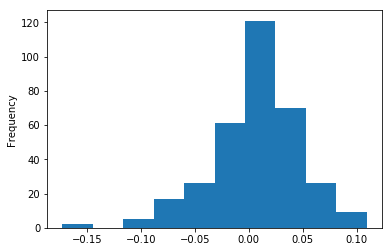

In [24]:
y_train['A1'].plot(kind="hist")

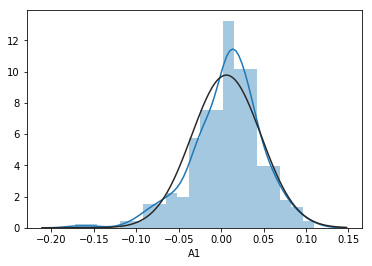

In [25]:
sns.distplot(y_train['A1'], fit = norm)

In [27]:
y_train['A1'].skew(), y_train['A1'].kurt()

(-0.6556341979365007, 1.4637909869471373)

#### Try transformations on the target variable

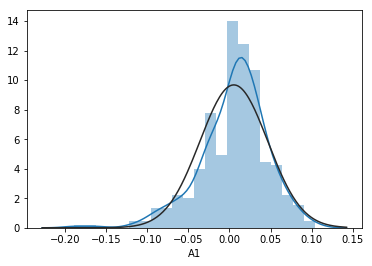

In [26]:
log_a1 = np.log1p(y_train['A1'])
sns.distplot(log_a1, fit = norm)

#### Other descriptive plots

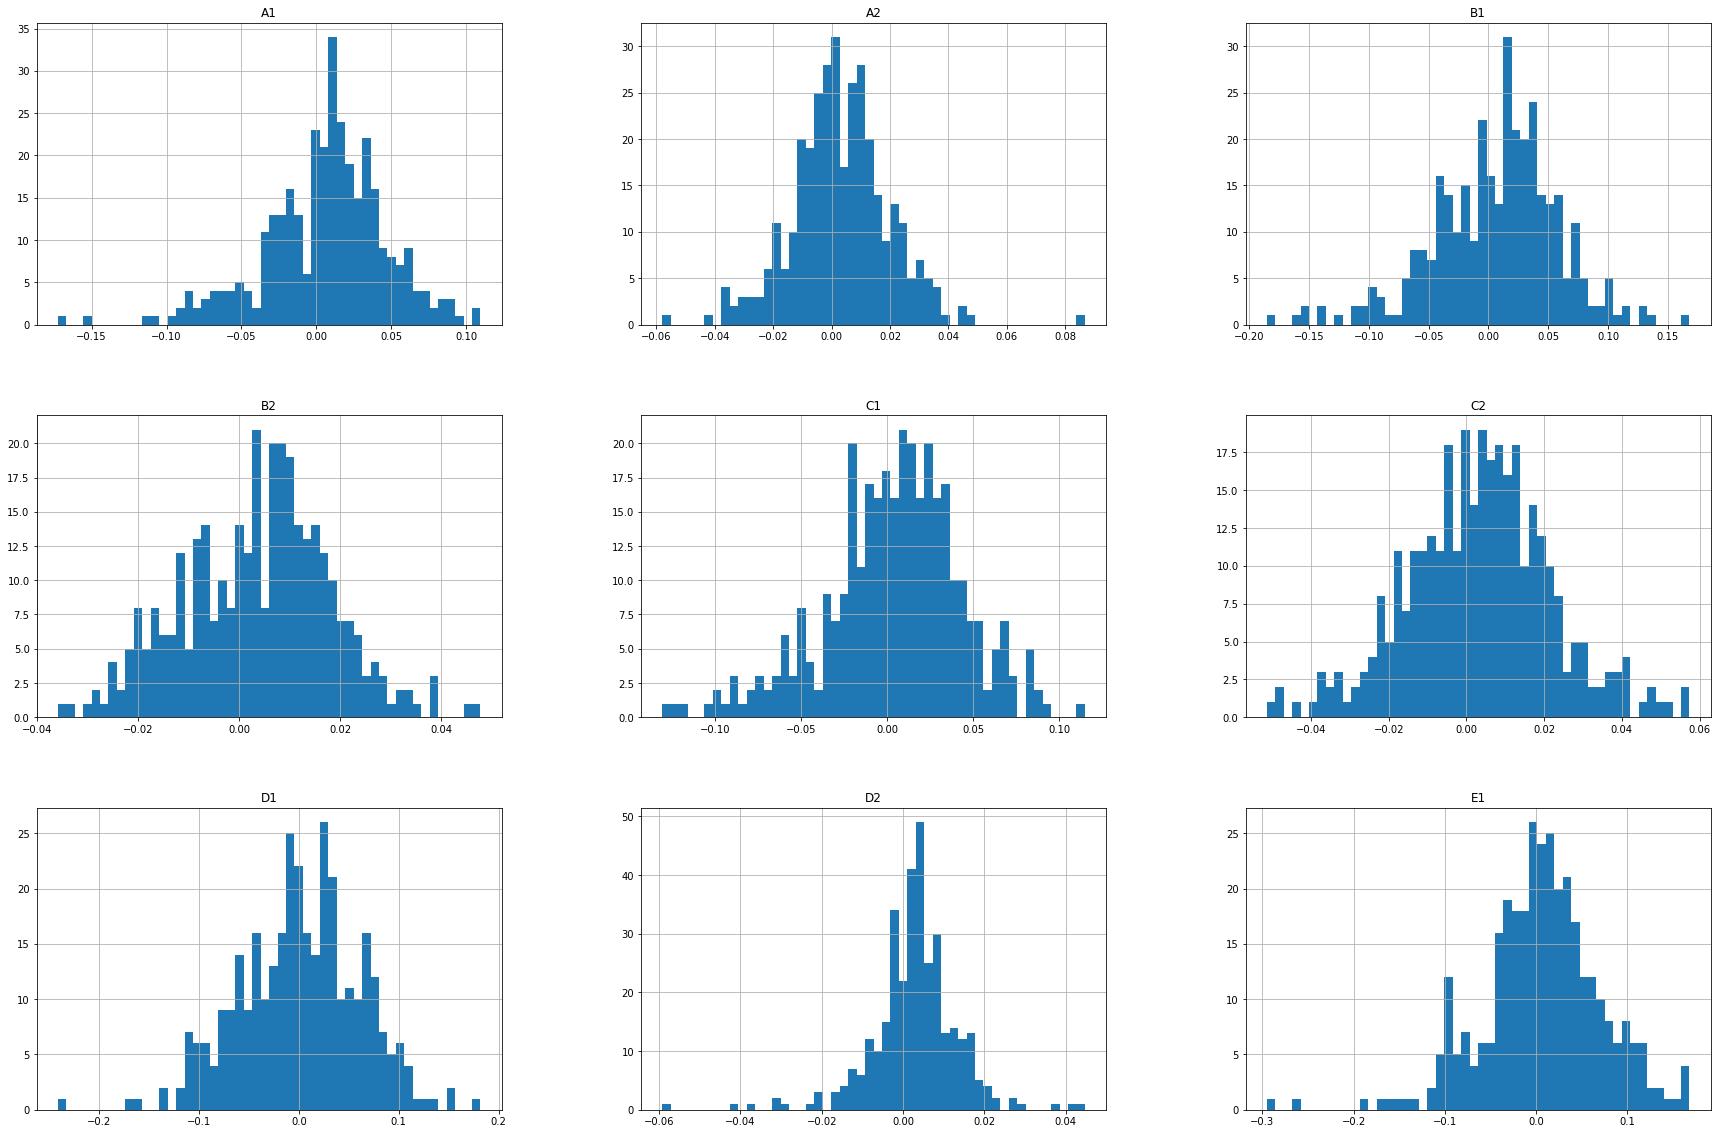

In [28]:
y_train.hist(bins=50, figsize=(30,20));

#### Explore relationships with explanatory variables

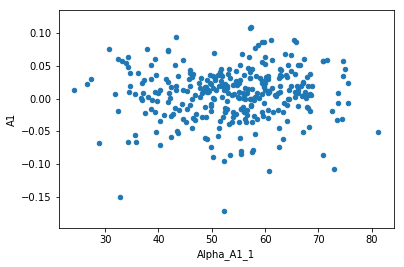

In [29]:
var = 'Alpha_A1_1'
data = pd.concat([y_train['A1'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='A1')

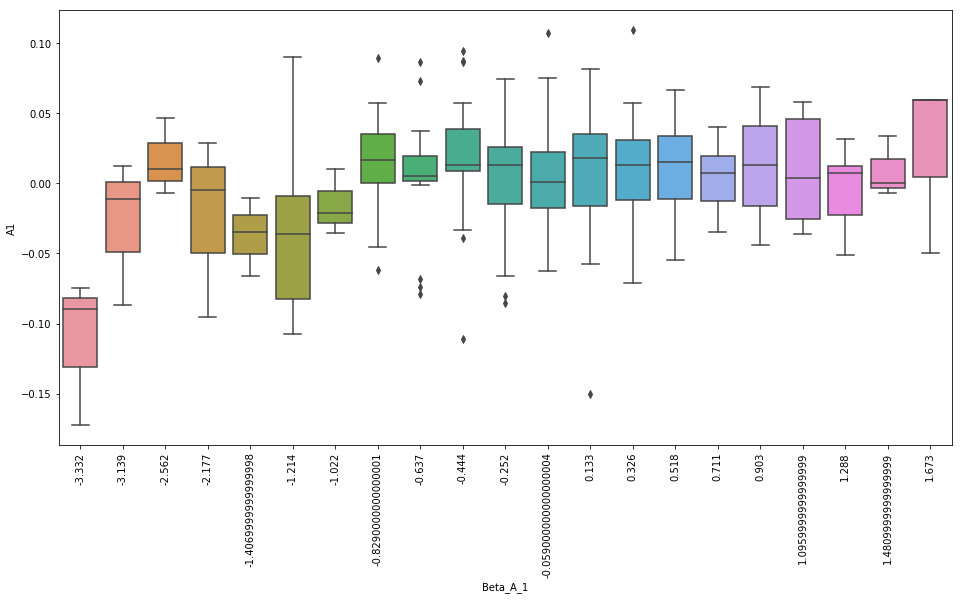

In [30]:
var = 'Beta_A_1'
data = pd.concat([y_train['A1'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='A1', data=data)
plt.xticks(rotation=90);

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


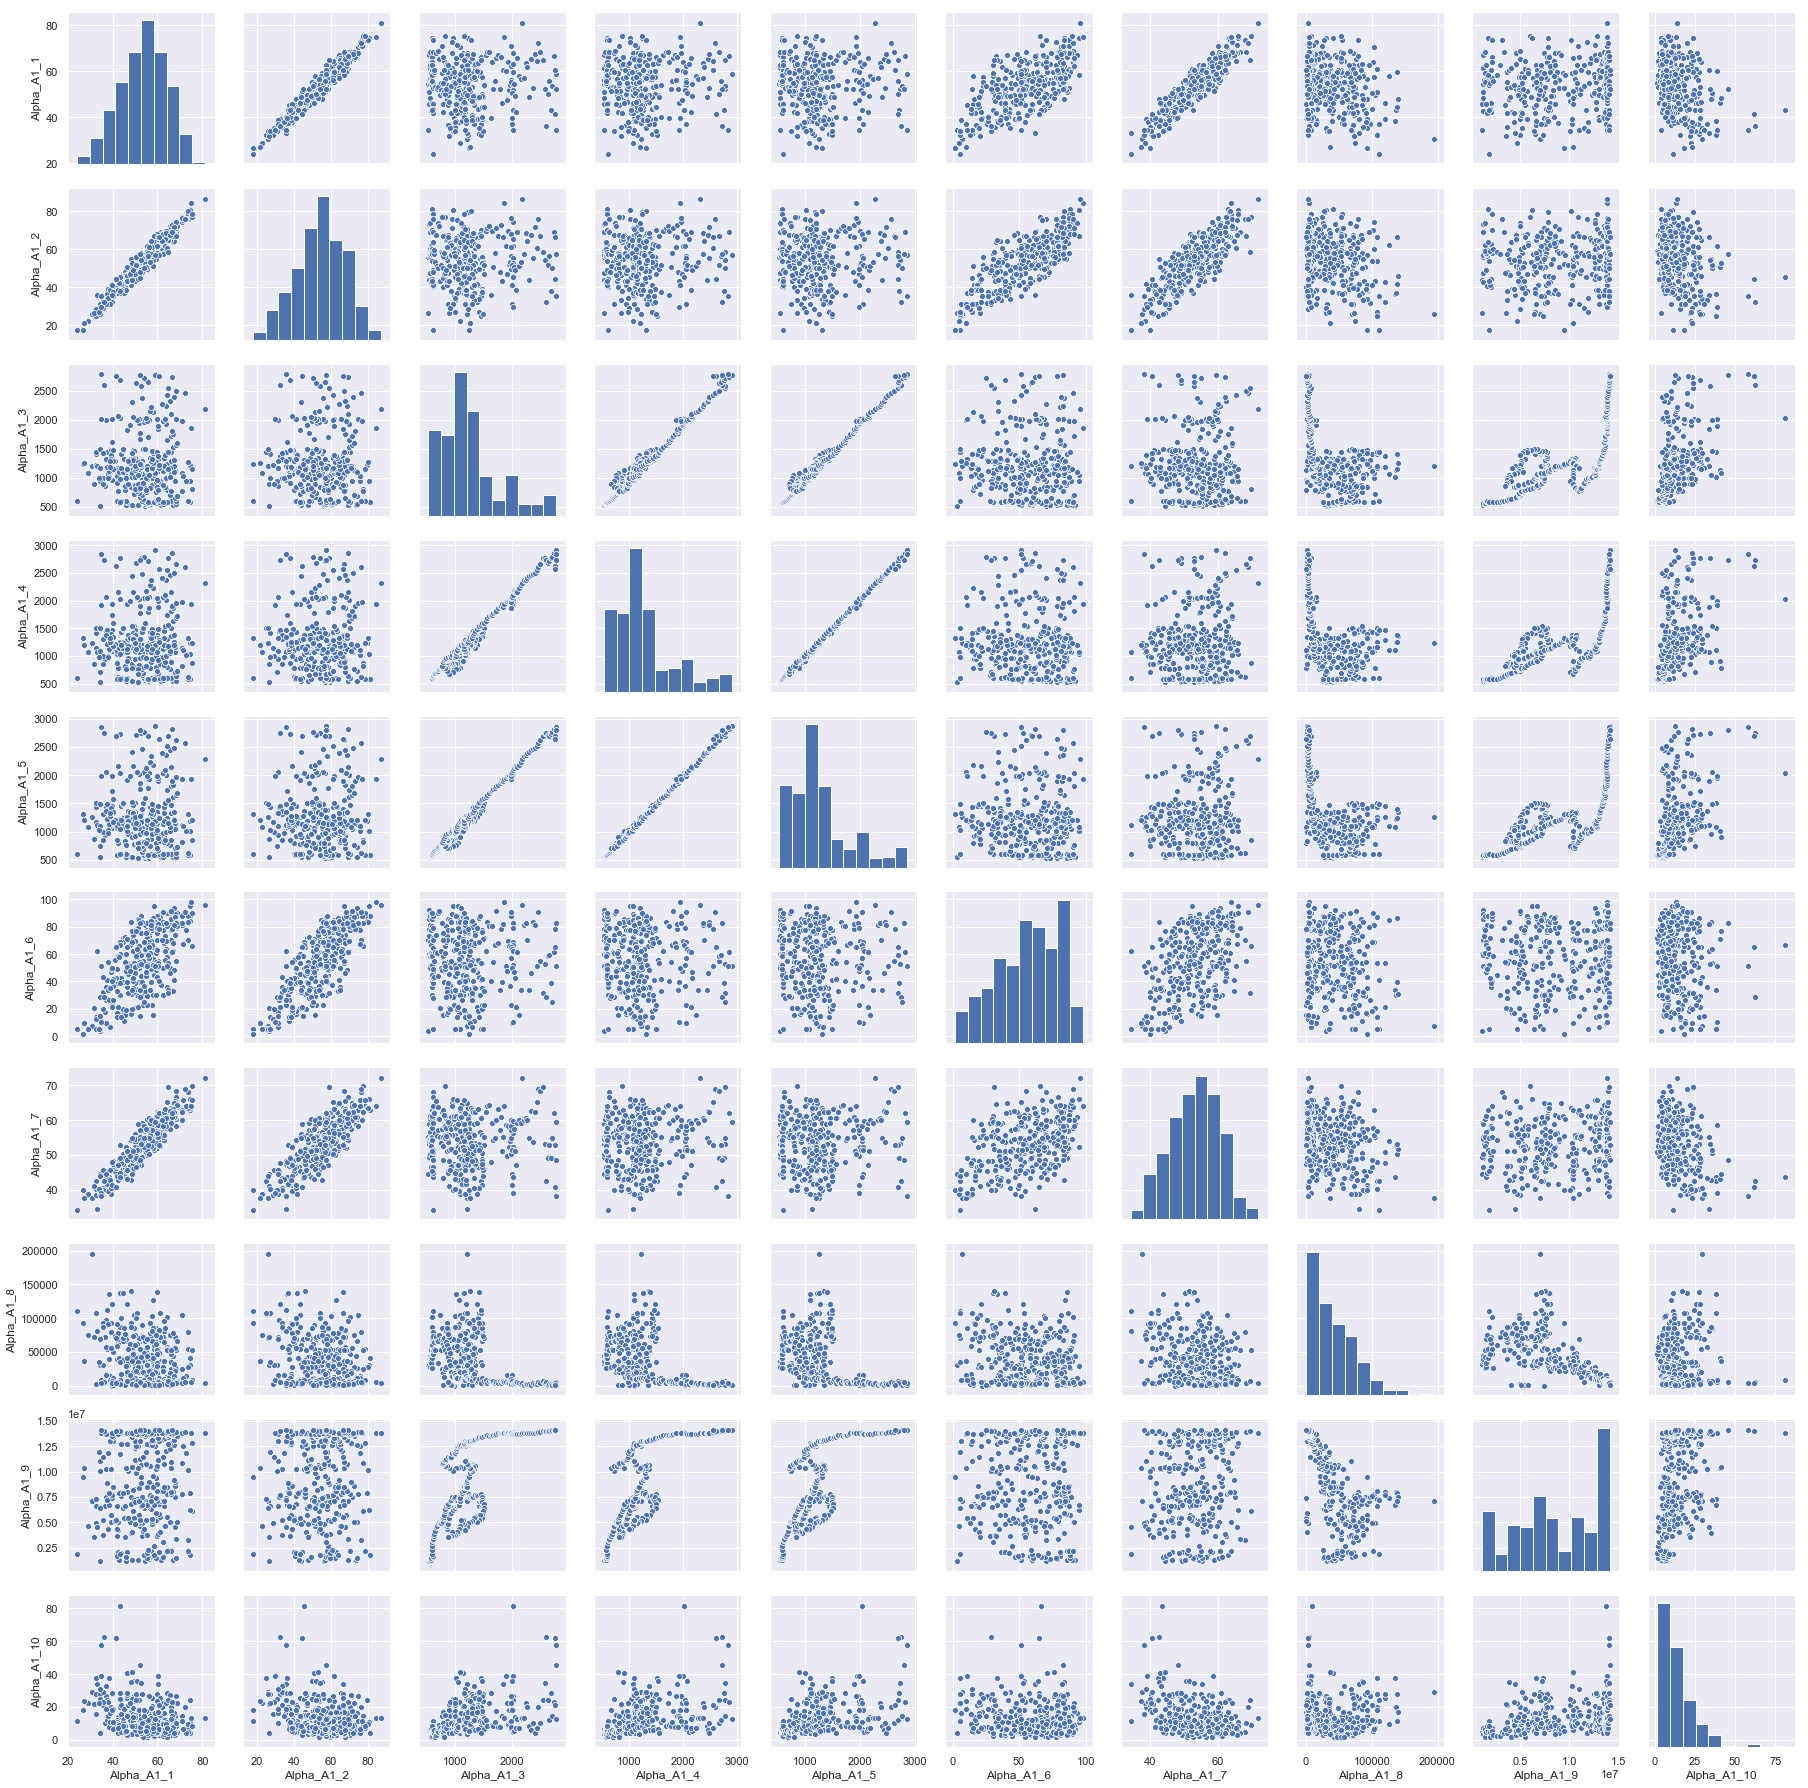

In [31]:
sns.set()
cols = ['Alpha_A1_1', 'Alpha_A1_2', 'Alpha_A1_3', 'Alpha_A1_4', 'Alpha_A1_5', 'Alpha_A1_6', 'Alpha_A1_7', 'Alpha_A1_8', 'Alpha_A1_9', 'Alpha_A1_10']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

#### Explore intercorrelations

In [ ]:
corrmat = df_train.corr(method='spearman')

In [ ]:
var = 'Alpha_A1_1'
f, ax = plt.subplots(figsize=(12, 10))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, var)[var].index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
cg = sns.clustermap(cm, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

#### Explore correlations with target variable

In [ ]:
tv = 'A1'
df_tv = df_train.join(y_train[var])
corrmat = df_tv.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, tv)[tv].index
cm = np.corrcoef(df_tv[cols].values.T)
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)